In [1]:
import pandas as pd
import glob 
import matplotlib.pyplot as plt
import numpy as np
  
raw_data_path = ''
file_list = glob.glob(raw_data_path + "1_2025-05-05_20-00.csv") 

In [2]:
file_list

['1_2025-05-05_20-00.csv']

In [3]:
main_dataframe = pd.read_csv(file_list[0])
for i in range(1, len(file_list)): 
    data = pd.read_csv(file_list[i]) 
    df = pd.DataFrame(data) 
    main_dataframe = pd.concat([main_dataframe, df], axis=0) 

In [4]:
main_dataframe


,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price_per_month,commissions,price,district,street,house_number,underground,residential_complex
0,ID 12891703,homeowner,https://www.cian.ru/sale/flat/315747133/,Москва,sale,flat,10,18,1,32.0,-1,0,13590000,Останкинский,Березовая аллея,19к1,Ботанический сад,Апарт-комплекс Легендарный квартал
1,V I B E,real_estate_agent,https://www.cian.ru/sale/flat/314702076/,Москва,sale,flat,2,18,1,41.0,-1,0,22600000,Беговой,Ленинградский проспект,29к3,Динамо,Царская площадь
2,Mr.Flip,real_estate_agent,https://www.cian.ru/sale/flat/316766731/,Москва,sale,flat,9,16,1,40.8,-1,0,11400000,Бутырский,Яблочкова,25К3,Тимирязевская,NaN
3,Whitewill,real_estate_agent,https://www.cian.ru/sale/flat/315253252/,Москва,sale,flat,71,79,1,79.0,-1,0,75000000,Пресненский,1-й Красногвардейский проезд,22с2,Москва-Сити,NEVA TOWERS
4,White and Broughton,real_estate_agent,https://www.cian.ru/sale/flat/313640113/,Москва,sale,flat,6,41,1,40.1,-1,0,35500000,Хорошевский,Ленинградский проспект,37/5,Аэропорт,Прайм Парк
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1263,Ладный Дом,real_estate_agent,https://www.cian.ru/sale/flat/316882393/,Москва,sale,flat,5,22,1,42.7,-1,0,9300000,Бирюлево Восточное,6-я Радиальная,7/1к1,Царицыно,Царицыно-2
1264,Ольга Кузьмичева,realtor,https://www.cian.ru/sale/flat/312862291/,Москва,sale,flat,15,19,1,34.0,-1,0,9300000,NaN,Омская,21,Аэропорт Внуково,NaN
1265,Мария Рыженкова,realtor,https://www.cian.ru/sale/flat/308135256/,Москва,sale,flat,2,9,1,29.9,-1,0,9300000,Восточное Измайлово,Измайловский бульвар,67К1,Первомайская,NaN
1266,Азбука Жилья,real_estate_agent,https://www.cian.ru/sale/flat/316073790/,Москва,sale,flat,1,9,1,29.1,-1,0,9399990,Выхино-Жулебино,Рязанский проспект,60,Рязанский проспект,NaN


In [5]:
main_dataframe['url_id'] = main_dataframe['url'].map(lambda x: x.split('/')[-2])
new_dataframe = main_dataframe[['url_id', 'total_meters', 'price']].set_index('url_id')

<Axes: >

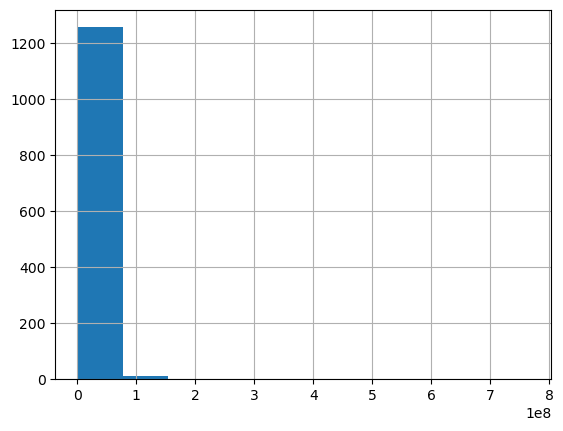

In [6]:
new_dataframe['price'].hist()

In [7]:
new_df = new_dataframe[new_dataframe['price'] < 100_000_000]
new_df = new_df[new_df['total_meters'] < 100]

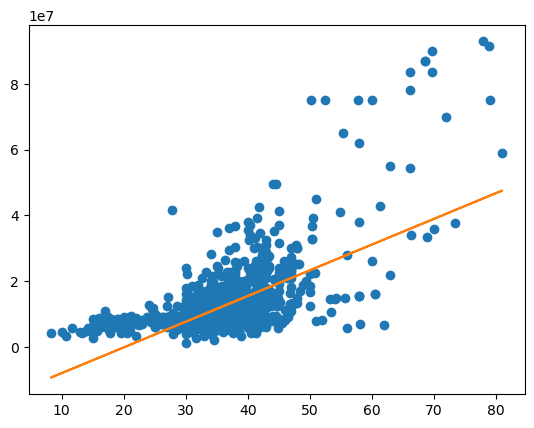

In [8]:
x = new_df['total_meters']
y = new_df['price']

plt.plot(x, y, 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

#add linear regression line to scatterplot 
plt.plot(x, m*x+b)

In [10]:
new_df.to_csv('train.csv', index=False)